In [20]:
## Downloaded neccessary modules and read csv file using Pandas 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import sklearn.tree as tree
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd
%matplotlib inline

cell_df = pd.read_csv('cell_df.csv')
cell_df


,Unnamed: 0,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
694,694,776715,3,1,1,1,3,2,1,1,1,2
695,695,841769,2,1,1,1,2,1,1,1,1,2
696,696,888820,5,10,10,3,7,3,8,10,2,4
697,697,897471,4,8,6,4,3,4,10,6,1,4


In [21]:
cell_df.drop(['Unnamed: 0'], axis=1, inplace=True)
cell_df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [22]:
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [23]:
## Checked for null values 

cell_df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [24]:
cell_df['BareNuc'].mean()

3.5550786838340485

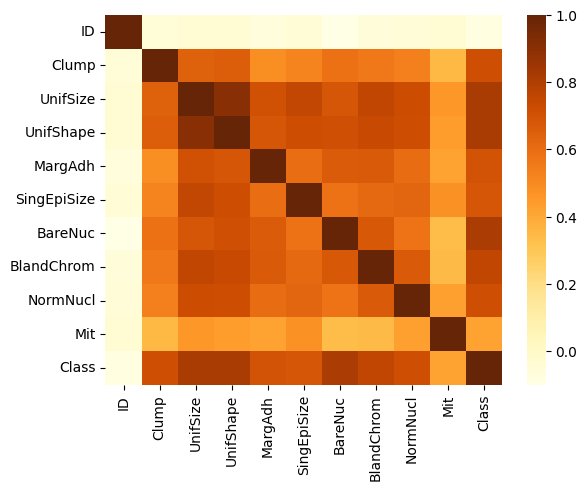

In [25]:
## Generated heatmap in Seaborn that visualizes the correlation between different data traits

import seaborn as sns  
cell_df.corr()
sns.heatmap(cell_df.corr(), cmap='YlOrBr')
plt.show()

In [26]:
## Split target data classes into separate dataframes for categorization

benign_data = cell_df[cell_df['Class']==2]
malignant_data = cell_df[cell_df['Class']==4]

<Axes: xlabel='Clump', ylabel='UnifSize'>

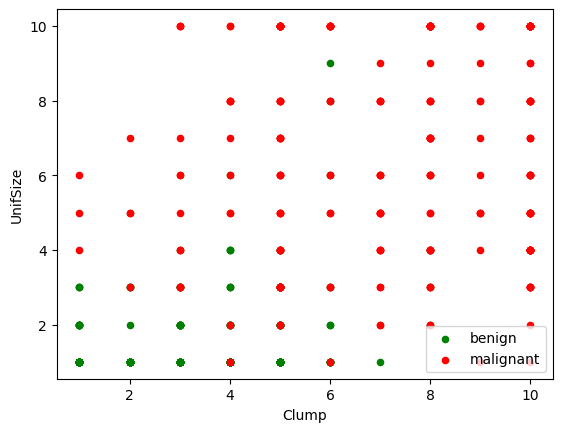

In [27]:
## Generated scatter plot to view pattern and relationship between different class categories
a = benign_data.plot(kind='scatter', x='Clump', y='UnifSize', label='benign', color='g')
malignant_data.plot(kind='scatter', x='Clump', y='UnifSize', label='malignant', color='r', ax = a)


In [28]:
## Assigned 'Class' column to target variable y
y = cell_df['Class']
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [29]:
## Dropped 'ID' and 'Class' columns to assign remaining columns as predictors to variable X

X = cell_df.drop(['ID','Class'], axis=1)
X


,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [31]:
## Split data into train and test data using Train_Test_Split


X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
## Generated support vector machine with desired parameters passed. Fitted the model with training data
classifier = svm.SVC(kernel='linear', gamma='auto', C=2 )
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [33]:
## Generated predictions based on the test data fed into SVM model
y_predict = classifier.predict(X_test)
y_predict

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2], dtype=int64)

In [34]:
## Generated classification report to review accuracy scores

from sklearn.metrics import classification_report
classification_report(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.96      0.99      0.97        95
           4       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



In [35]:
## Passed predicted class values into dataframe for desired presentation
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Class'])
y_predict


,Predicted Class
0,2
1,2
2,2
3,4
4,2
...,...
135,2
136,4
137,2
138,2


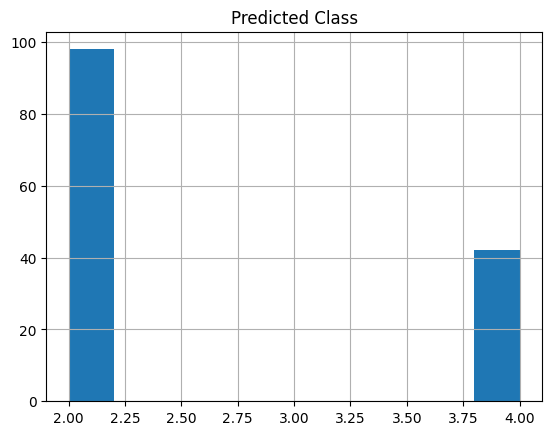

In [36]:
## Generated histogram to view quantity of each class predicted

y_predict.hist()
plt.show()

In [128]:
y_predict.value_counts()

Predicted Class
2                  98
4                  42
Name: count, dtype: int64